## **Assignment 1 - Machine Learning - LB01**
### **Fendy Wijaya - 2602092150**

#Code

In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("gender_submission.csv")

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
print(train.shape)

(891, 12)


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
print(test.shape)

(418, 11)


In [18]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#Exploratory Data Analysis (EDA)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [22]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Sampai pada tahap ini, kita dapat ketahui bahwa train dan test dataset masih belum bersih karena beberapa feature masih memiliki nilai null value.

In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dari method describe, kita dapat menangkap ukuran pemusatan dan penyebaran data dari train dataset, mulai dari rata-rata, kuartil, nilai maksimum dan minimum, hingga simpangan baku (standar deviasi).

##Categorical Variable: Gender

In [24]:
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [25]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

# Kalo mau disort
# train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probabilities by Gender')

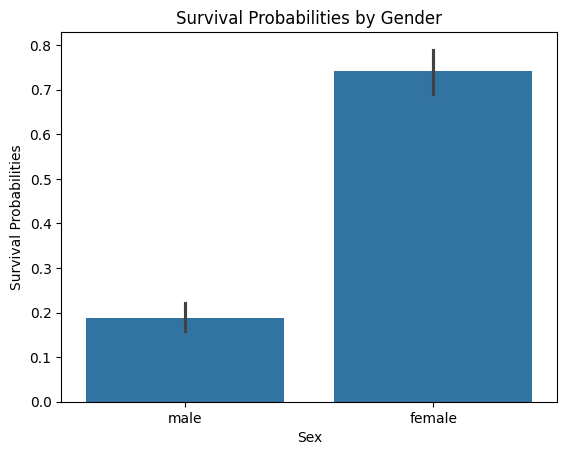

In [26]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel('Survival Probabilities')
plt.title('Survival Probabilities by Gender')

Dari sini, kita dapat ketahui bahwa jenis kelamin perempuan memiliki peluang bertahan hidup jauh lebih besar daripada laki-laki. Perempuan berpeluang sekitar 74% untuk bertahan hidup, sementara laki-laki hanya berpeluang sekitar 19% saja untuk bertahan hidup. Ada pengaruh antara feature 'Sex' dengan peluang bertahan hidup individu.

##Categorical Variable: Passenger Class

In [27]:
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probabilities by Passenger Class')

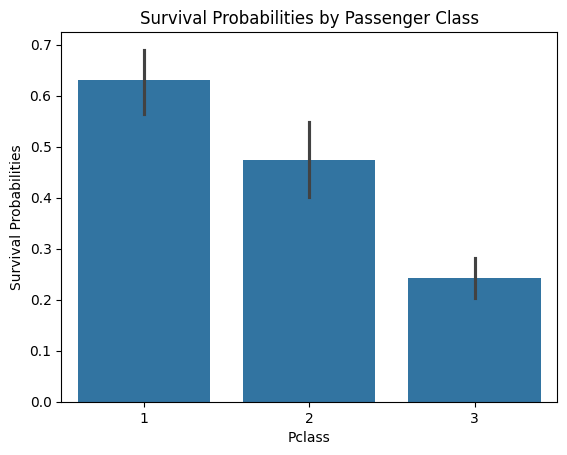

In [29]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.ylabel('Survival Probabilities')
plt.title('Survival Probabilities by Passenger Class')

Dari sini, kita dapat ketahui bahwa feature passenger class 1 memiliki peluang bertahan hidup yang cukup besar, yaitu 63%. Passenger class 2 berpeluang bertahan sebesar 47% dan passenger class 3 berpeluang 24%. Ditemukan bahwa ada pengaruh antara feature 'Pclass' dengan peluang bertahan hidup individu.

##Categorical Variable: Embarked

In [30]:
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [31]:
train[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probabilities by Embarked')

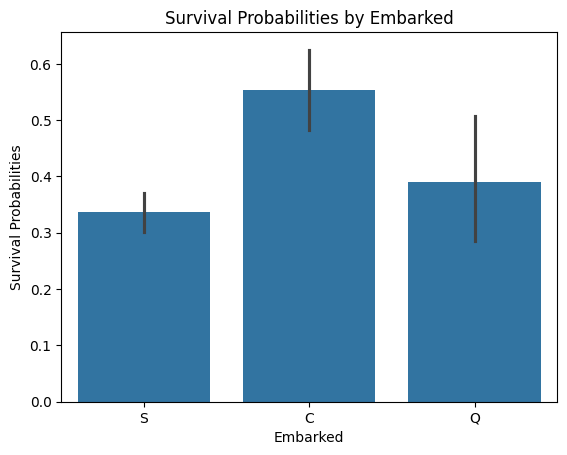

In [32]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.ylabel('Survival Probabilities')
plt.title('Survival Probabilities by Embarked')

Dari sini, kita dapat ketahui bahwa feature Embarked C memiliki peluang bertahan hidup jauh lebih besar dibandingkan S dan Q, yaitu sebesar 55%. Berbeda dengan Embarked Q yang peluangnya sebesar 39% dan S dengan peluang sebesar 34%. Ada pola pengaruh yang dimunculkan oleh feature 'Embarked' dengan peluang bertahan hidup individu.

##Bivariate Analysis: Pclass and Embarked

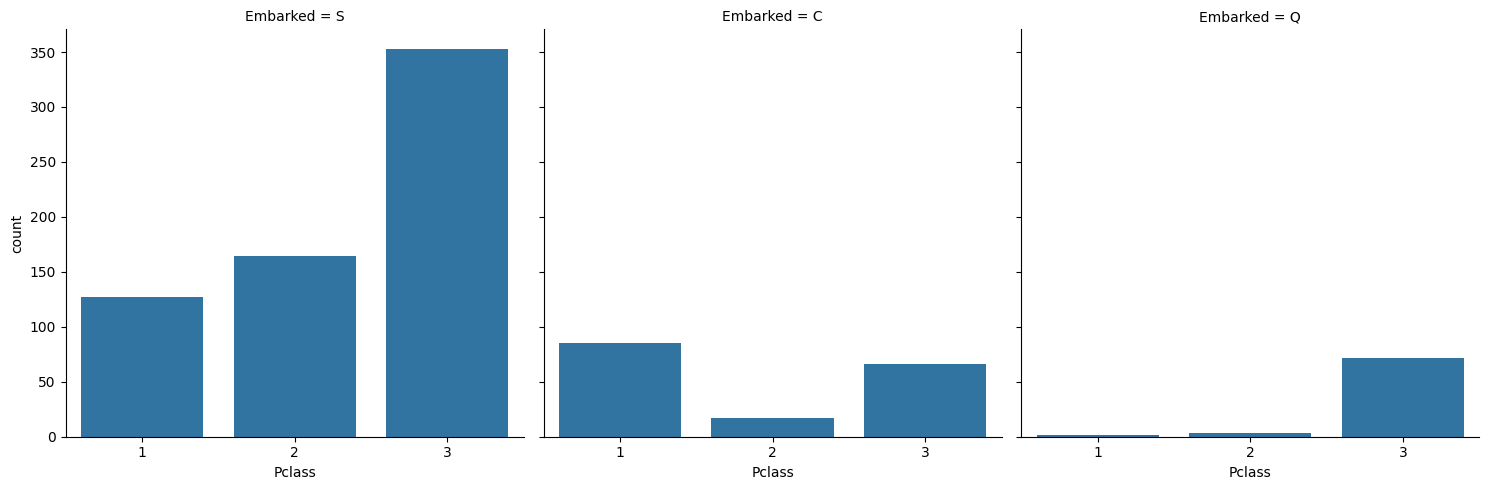

In [33]:
sns.catplot(x = 'Pclass', col = 'Embarked', data = train, kind = 'count')

Analisis ini menggunakan dua feature sekaligus, yaitu Pclass dan Embarked, yang secara analisis univariat jelas menunjukkan adanya pengaruh pada peluang bertahan hidup. Dari analisis bivariat ini, ditemukan pola bahwa tempat embarkasi yang paling banyak orang minati adalah Embarked S, khususnya kelas penumpang ke-3. Kita dapat melihat pola perilaku penumpang kapal dari analisis ini.

##Multivariate Analysis: Embarked, Pclass, Sex

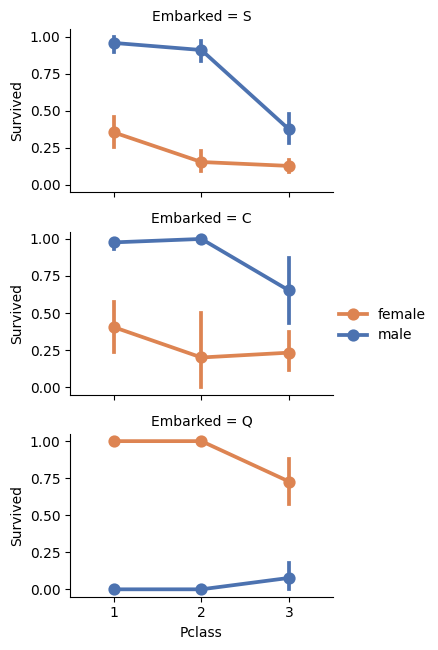

In [34]:
grid = sns.FacetGrid(train, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

Analisis ini menunjukkan pengaruh yang dimunculkan oleh banyak variabel sekaligus terhadap peluang bertahan hidup individu. Terlihat bahwa untuk wilayah embarkasi Q, mayoritas perempuan selamat dan laki-laki tidak selamat. Berbeda dengan S dan C, yang laki-lakinya cenderung selamat dan perempuan cenderung tidak selamat. Akan tetapi, gap yang terbentuk pada Embarked S dan C tidak sejauh gap pada Embarked Q dengan peluang hampir nol dan hampir 1 untuk semua kelas penumpang.

##Heatmap Correlation Analysis

<Axes: >

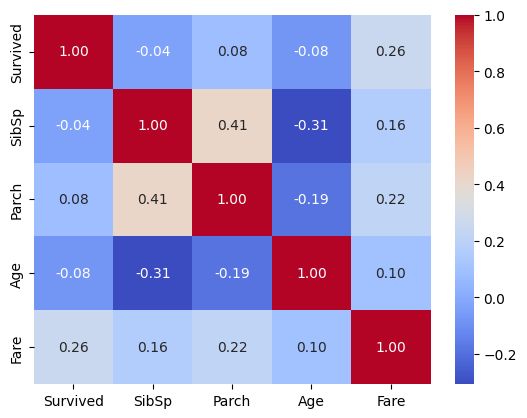

In [35]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

Dari heatmap tersebut, kita dapat menemukan korelasi antarfeature, di mana feature 'Fare' memiliki korelasi positif dengan semua feature lain, hanya saja tidak terlalu signifikan. Feature 'Age' memiliki korelasi negatif dengan variabel lain. Feature 'Parch' berkorelasi positif, dan ada pengaruh yang signifikan pada hubungan dengan feature 'SibSp'.

##Age Distribution (Skewness)

Text(0.5, 1.0, 'Passenger Age Distribution')

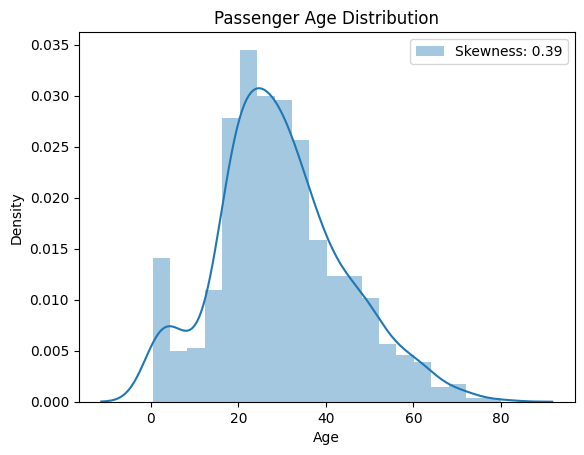

In [36]:
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title("Passenger Age Distribution")

Dari sini, kita dapat mengetahui bahwa penumpang didominasi oleh orang-orang berusia muda sekitar 20-30 tahun, dengan kurva yang cukup miring di sisi kanan.

##Age Distribution by Survivability

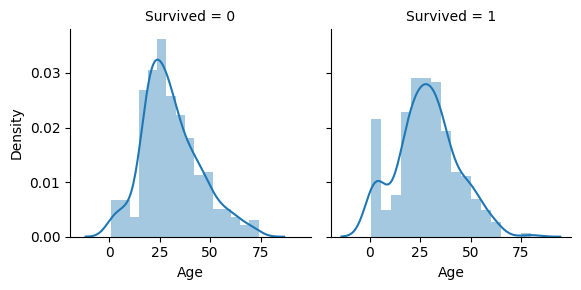

In [37]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Sampai tahap ini, kita dapat ketahui bahwa usia sekitar 25 tahun mendominasi di kedua kondisi, baik yang bertahan maupun tidak. Hanya saja, kerapatan survivality memang lebih besar untuk kondisi tidak bertahan hidup. Sementara untuk kondisi bertahan hidup, terlihat bahwa usia balita juga memiliki kerapatan cukup tinggi, menunjukkan tren adanya kejadian balita-balita yang selamat dari peristiwa tersebut.

#Data Preprocessing

##Handling Missing Values

Lakukan pengecekan feature yang memiliki nilai null.

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
train = train.drop(['Cabin'], axis = 1)

Feature 'Cabin' memiliki nilai null yang sangat banyak. Akan tetapi, feature ini terlihat tidak ada hubungannya dengan peluang bertahan hidup seseorang, sehingga kita dapat menghapus feature ini agar tidak mengganggu proses kerja mesin.

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [42]:
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [43]:
train['Embarked'].fillna(mode, inplace = True)

Feature 'Embarked' memiliki null value yang sangat sedikit, hanya 2 row saja. Data ini merupakan data kategorik, sehingga untuk menanganinya, kita dapat mengisi null value tersebut dengan data yang menjadi modus dari kolom 'Embarked', yaitu S. Hal ini disebabkan karena kemungkinan muncul S cukup besar, sehingga kemungkinan besar nilai null value ini diisi oleh S.

In [44]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [45]:
probability = train['Age'].value_counts(normalize=True)
missing = train[train['Age'].isnull()].index
train.loc[missing, 'Age'] = np.random.choice(probability.index, size=len(missing), p=probability.values)

In [46]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Pada blok code di atas, nilai feature 'Age' diisi untuk menghilangkan null values yang masih tersisa. Pada kasus ini, metode yang digunakan adalah pengisian berdasarkan nilai probabilitas umur yang mungkin muncul. Hal ini dilakukan agar nilai umur yang diisikan tidak semuanya bernilai sama, melainkan beragam menyesuaikan dengan probabilitas kemunculan umur dari data yang sudah ada sebelumnya.

In [47]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)

Feature-feature yang tidak memiliki pengaruh signifikan terhadap survivability penumpang sebaiknya dihilangkan (di-drop) saja untuk mencegah terjadinya penurunan nilai akurasi model yang akan dibuat.

In [48]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


##Encoding Categorical Data

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

In [50]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


Proses encoding yang pertama kali dilakukan adalah mengkodekan feature 'Sex' yang masih bernilai Male atau Female. Pada kasus ini, metode encoding yang digunakan adalah Label Encoding. Alasannya karena feature 'Sex' hanya memiliki unique value berupa string 'Male' atau 'Female', yang dapat dikodekan menjadi nilai numerik 0 dan 1 dengan sangat mudah. Nilai numerik pengkode ini tidak terlalu banyak (hanya 0 dan 1), sehingga tidak akan mengganggu akurasi model.

In [51]:
train = pd.get_dummies(train, columns=['Embarked'], dtype=int)

In [52]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


Feature selanjutnya yang masih berupa data kategorik adalah feature 'Embarked'. Feature ini akan diubah menjadi bentuk numerik dengan menggunakan metode One-Hot Encoding, khususnya dengan memanfaatkan library Pandas, method get_dummies. Metode ini cocok untuk feature yang memiliki jumlah unique value cukup banyak (dalam hal ini 3 nilai unique), agar pelabelan tidak menyebabkan kemungkinan sistem membaca label numerik dalam numerical order. Metode ini akan menghasilkan kolom baru yang merupakan bentuk matriks dari ketiga unique value tersebut, sehingga data numerik dari ketiga kolom yang dibentuk tidak akan menyebabkan numerical order.

##Normalization/Standardization Numerical Data

In [53]:
train['Age'] = (train['Age'] - train['Age'].mean()) / train['Age'].std()

In [54]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.536372,1,0,0,0,1
1,1,1,0,0.572918,1,0,1,0,0
2,1,3,0,-0.259050,0,0,0,0,1
3,1,1,0,0.364926,1,0,0,0,1
4,0,3,1,0.364926,0,0,0,0,1


Langkah preprocessing selanjutnya adalah melakukan normalisasi atau standardisasi atas data-data numerik yang masih memiliki range cukup jauh. Dari data yang ada, terlihat bahwa range pada feature 'Age' masih memiliki kisaran yang cukup jauh, sehingga harus distandardisasi. Alasan pemilihan standardisasi adalah karena kemudahan formula dan akurasinya dalam statistika, sehingga diharapkan model memiliki akurasi yang juga cukup baik.
Rumus standardisasi adalah sebagai berikut:

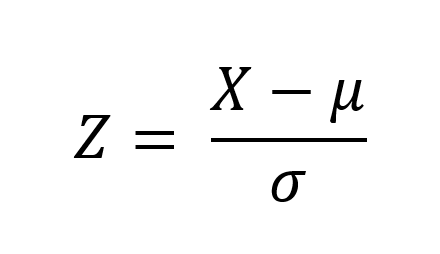

#Model Implementation

Model yang akan digunakan adalah Logistic Regression. Data pada train.csv akan di-split sebanyak 70% untuk train dan 30% untuk test.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
y = train['Survived']
X = train.drop(['Survived'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = lr.fit(x_train, y_train)

prediction = model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy score dengan Logistic Regression =", round(accuracy_score(y_test, prediction)*100, 2), '%')
print("Recall score dengan Logistic Regression =", round(recall_score(y_test, prediction)*100, 2), '%')
print("Precision score dengan Logistic Regression =", round(precision_score(y_test, prediction)*100, 2), '%')
print("F1-score dengan Logistic Regression =", round(f1_score(y_test, prediction)*100, 2), '%')
print("ROC-AUC-score dengan Logistic Regression =", round(roc_auc_score(y_test, prediction)*100, 2), '%')

Accuracy score dengan Logistic Regression = 81.72 %
Recall score dengan Logistic Regression = 73.87 %
Precision score dengan Logistic Regression = 80.39 %
F1-score dengan Logistic Regression = 77.0 %
ROC-AUC-score dengan Logistic Regression = 80.57 %


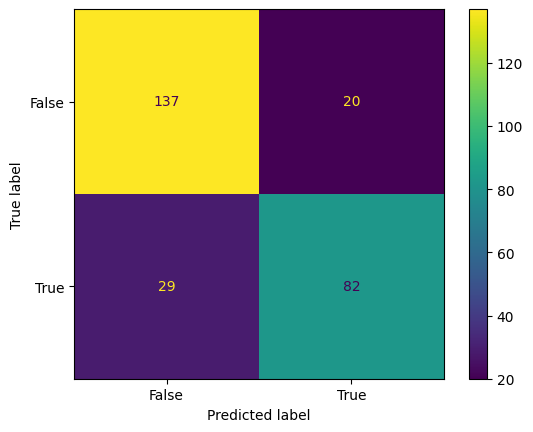

In [58]:
confusion_matrix = confusion_matrix(y_test, prediction)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False,True])
display.plot()
plt.show()

Text(0, 0.5, 'True Positive Rate')

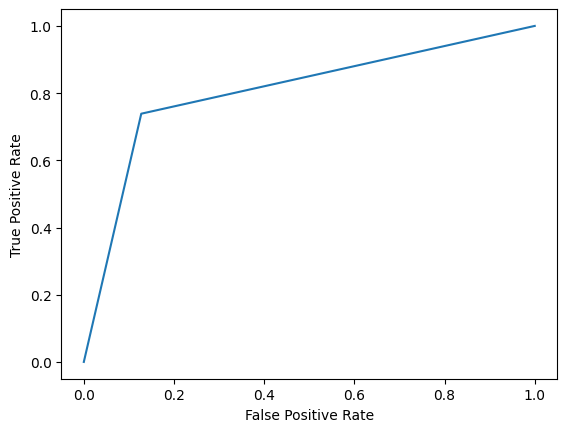

In [59]:
FPR, TPR, threshold = roc_curve(y_test, prediction)
plt.plot(FPR, TPR)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")